# Portfolio Analysis of Consumer discretionary sector

### Stocks under observation:

    - Wayfair Inc. (NYSE:W)
    - Nike (NYSE:NKE)
    - Target (NYSE:TGT)
    - Amazon.com Inc. (NYSE:AMZN)
    - Home Depot (NYSE:HD)
    - Alibaba Group Holding Limited  (NYSE:BABA)

In [38]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data as wb
import scipy.optimize as sco
import warnings

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
np.random.seed(777)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Pulling stock data 

In [39]:
consumer = ['W', 'NKE', 'TGT', 'AMZN','HD', 'BABA' ]
data = pd.DataFrame()
for i in range(len(consumer)):
    
    df = wb.DataReader(consumer[i], data_source='yahoo', start='2020-1-1')
    df['stock'] = consumer[i]
    data = data.append(df[['Adj Close', 'stock']])

table = data.pivot(columns='stock')
# By specifying col[1] in below list comprehension
# You can select the stock names under multi-level column
table.columns = [col[1] for col in table.columns]
table.head()

,AMZN,BABA,HD,NKE,TGT,W
Date,,,,,,
2020-01-02,1898.010010,219.770004,218.200150,101.917229,125.356583,93.139999
2020-01-03,1874.969971,217.000000,217.474991,101.638008,124.053993,94.040001
2020-01-06,1902.880005,216.639999,218.498154,101.548264,122.880669,94.669998
2020-01-07,1906.859985,217.630005,217.067719,101.498398,123.099426,95.699997
2020-01-08,1891.969971,218.000000,220.315979,101.269035,122.701691,95.169998


Text(0, 0.5, 'price in $')

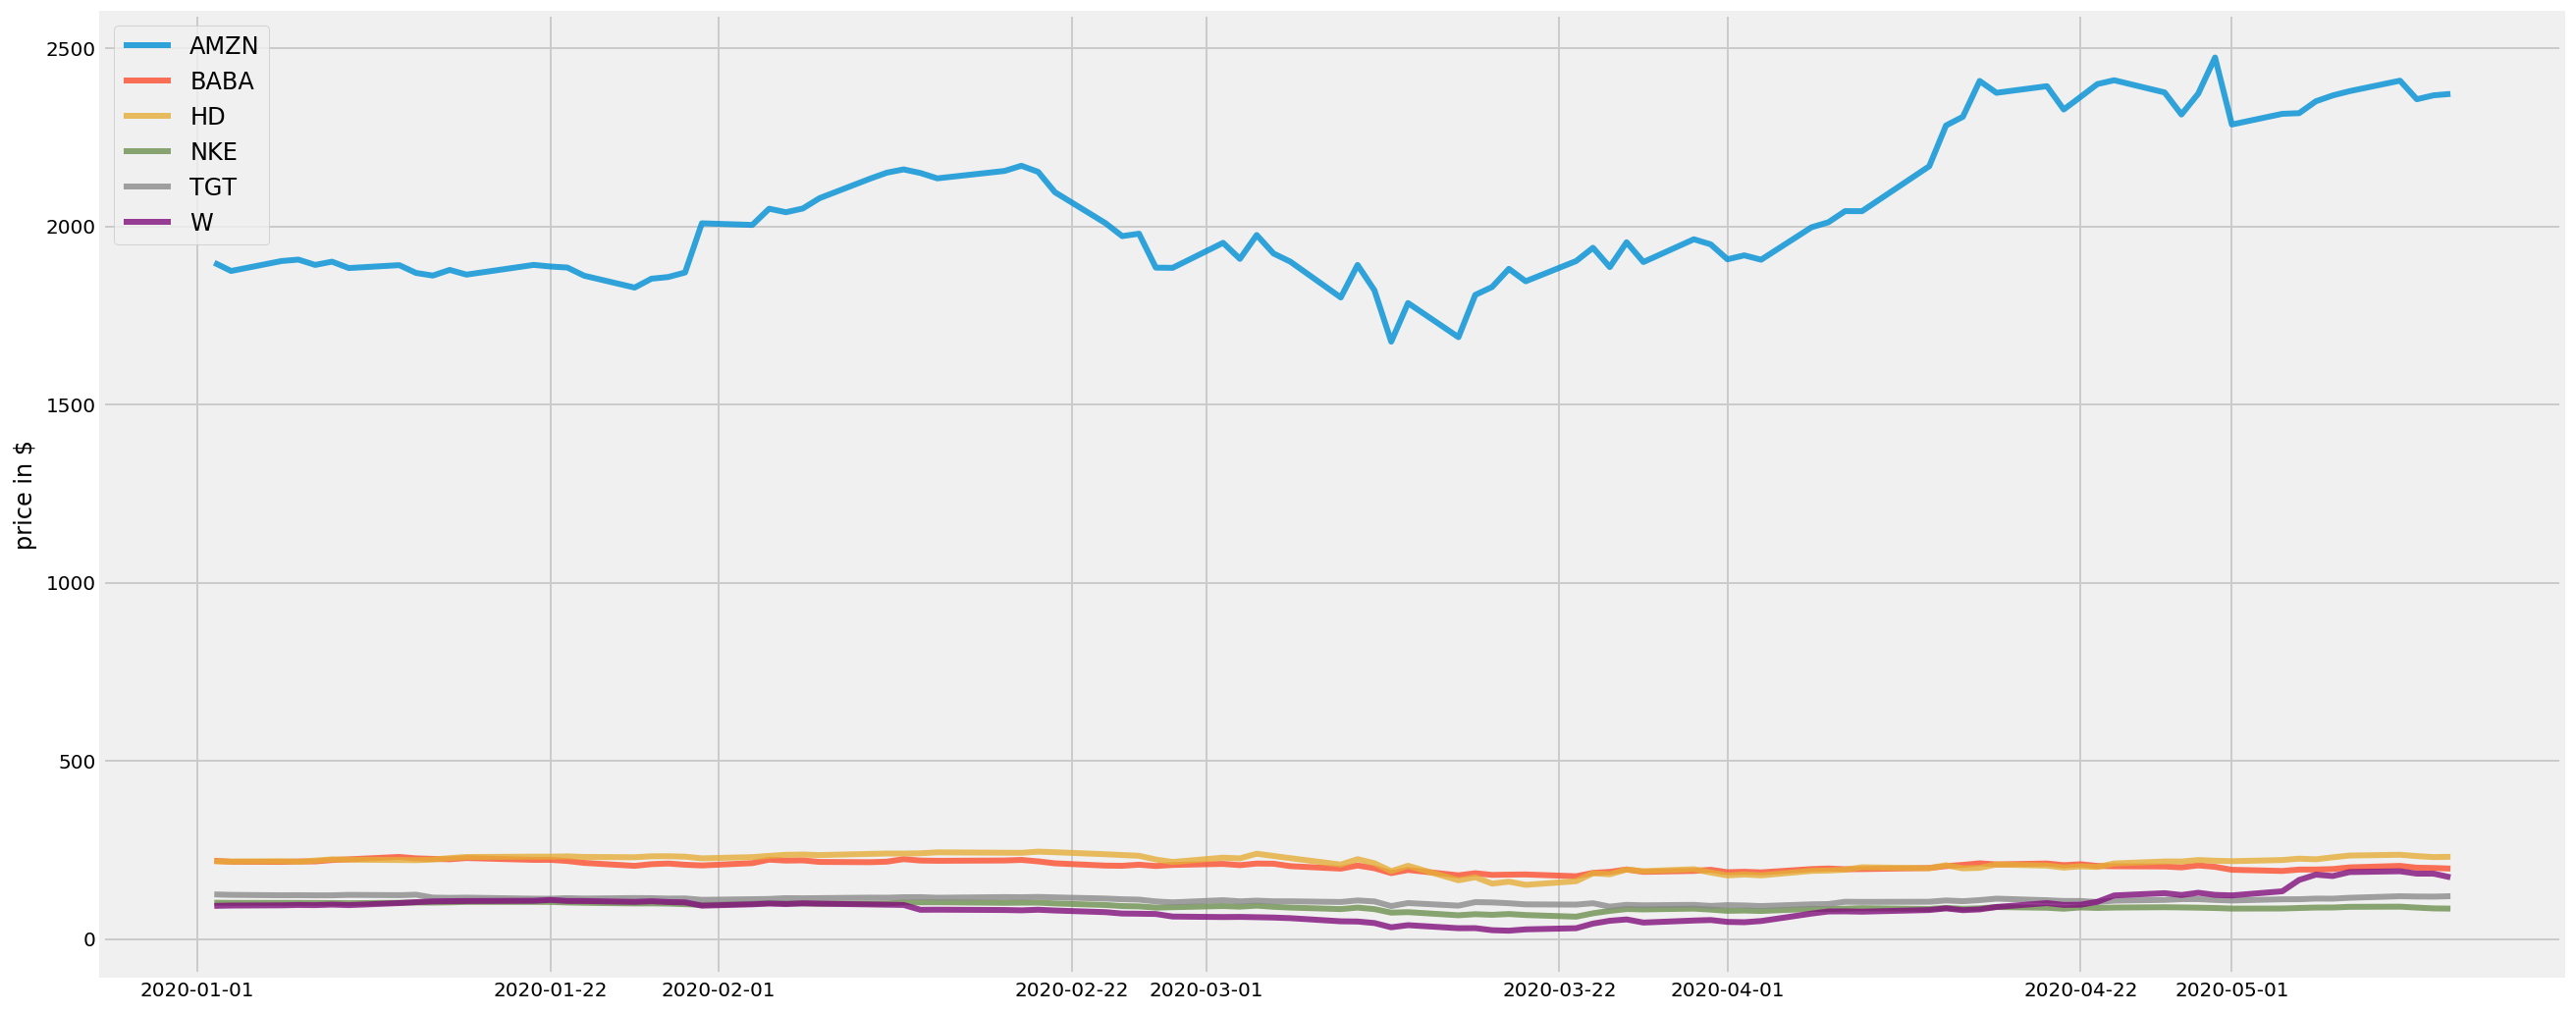

In [40]:
plt.figure(figsize=(20, 9))
for c in table.columns.values:
    plt.plot(table.index, table[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('price in $')

### Simple returns

Text(0, 0.5, 'daily returns')

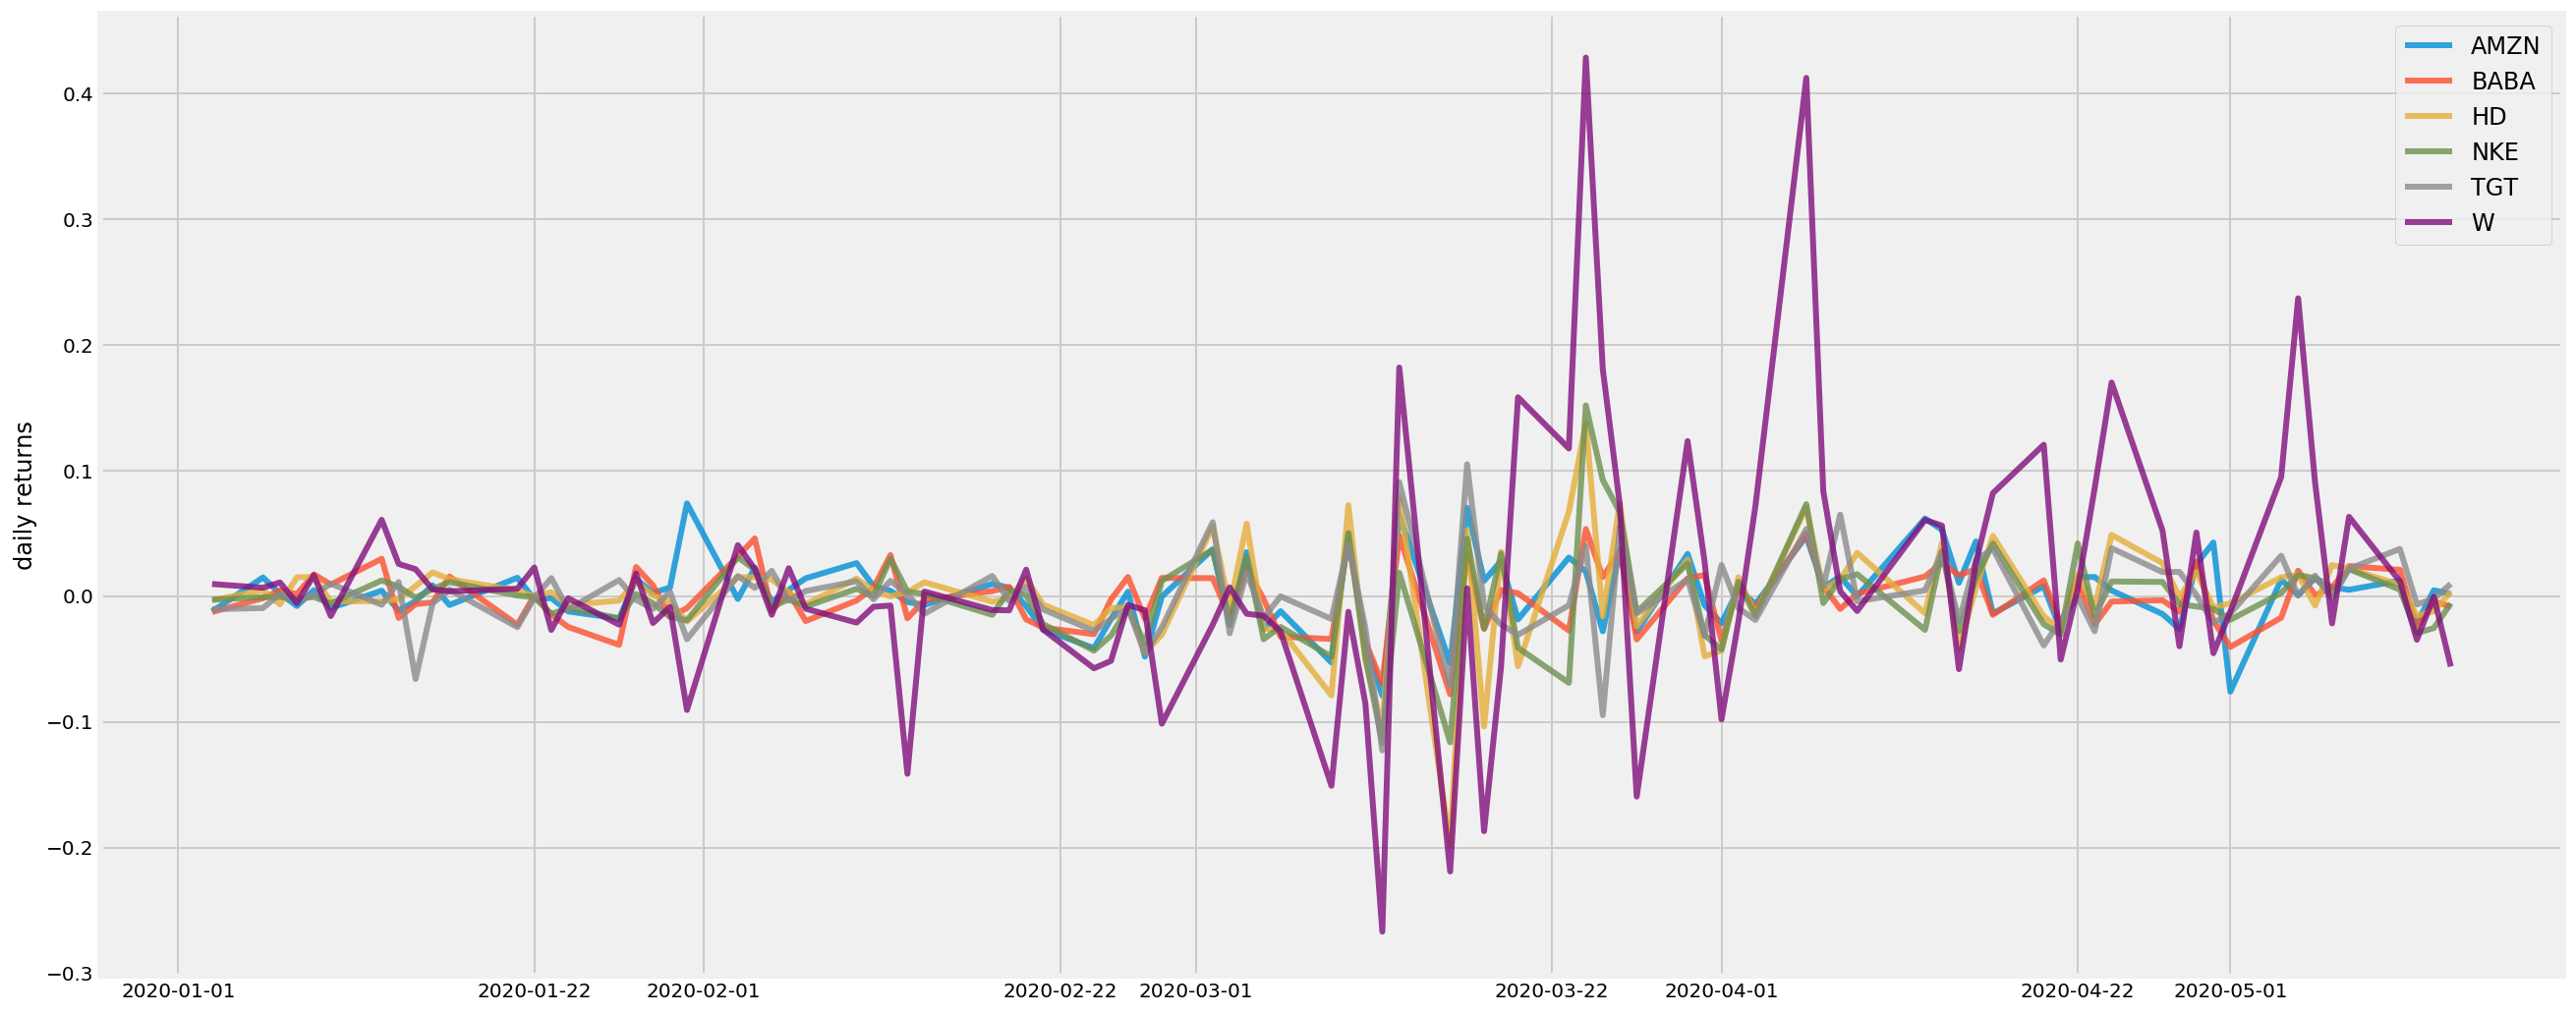

In [41]:
returns = table.pct_change()
plt.figure(figsize=(20, 9))
for c in returns.columns.values:
    plt.plot(returns.index, returns[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('daily returns')

### log returns

Text(0, 0.5, 'daily log returns')

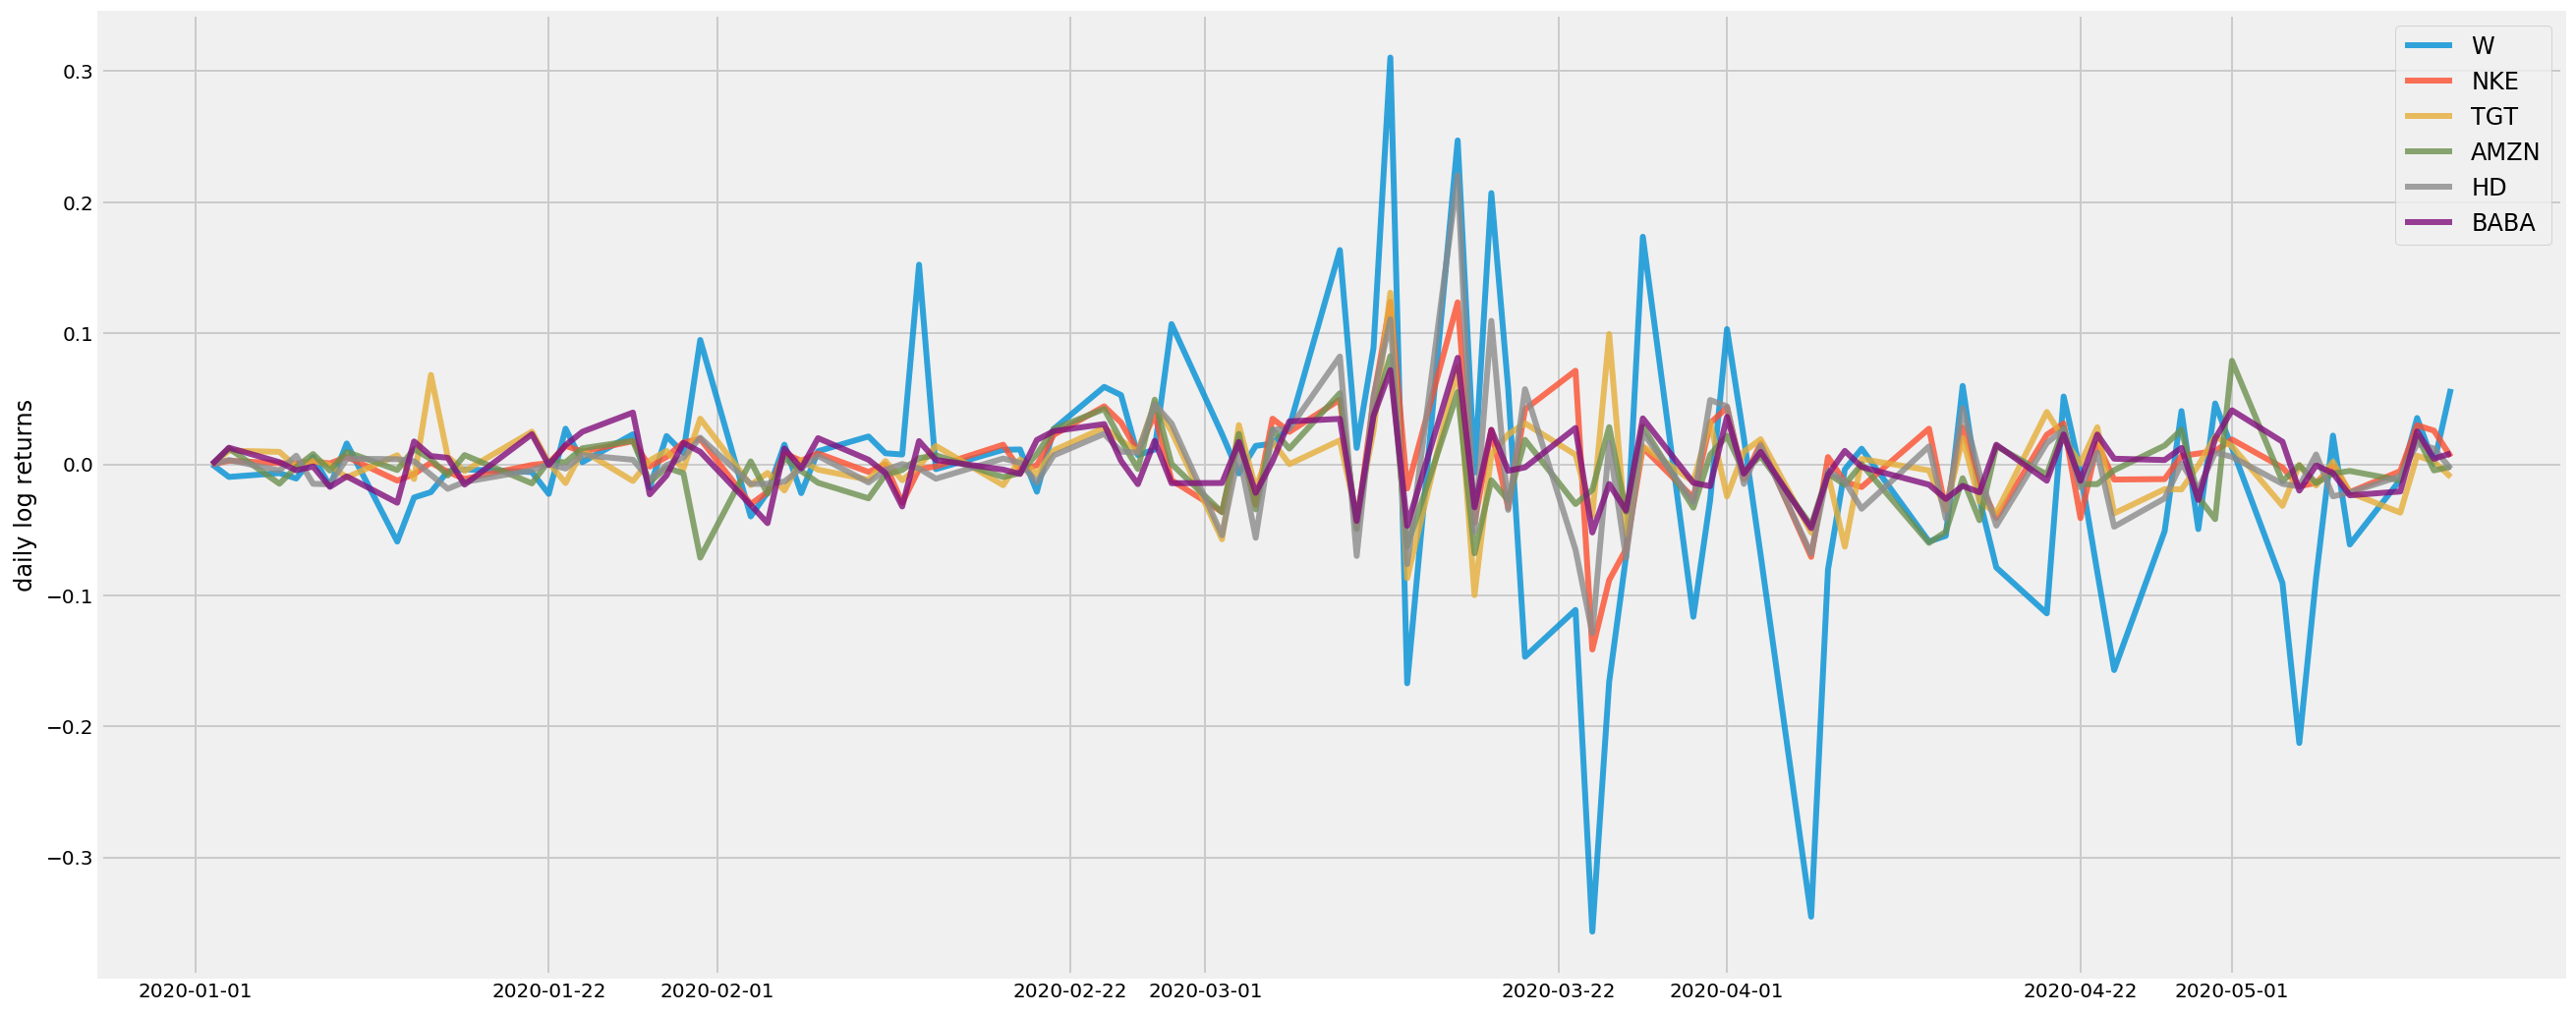

In [42]:
log = pd.DataFrame(columns = consumer, index = table.index)

for i in range(len(consumer)):
    log_list = []
    for j in range(len(table[consumer[i]])):
        if(j+1<len(table[consumer[i]])):
            log_returns =  np.log(table[consumer[i]][j]) - np.log(table[consumer[i]][j+1])
            log_list.append(log_returns)
            

        else:
            None
    log_list.insert(0, 0)   
    log[consumer[i]] = log_list


plt.figure(figsize=(20, 9))
for c in log.columns.values:
     plt.plot(log.index, log[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('daily log returns')


### Normalization to 100

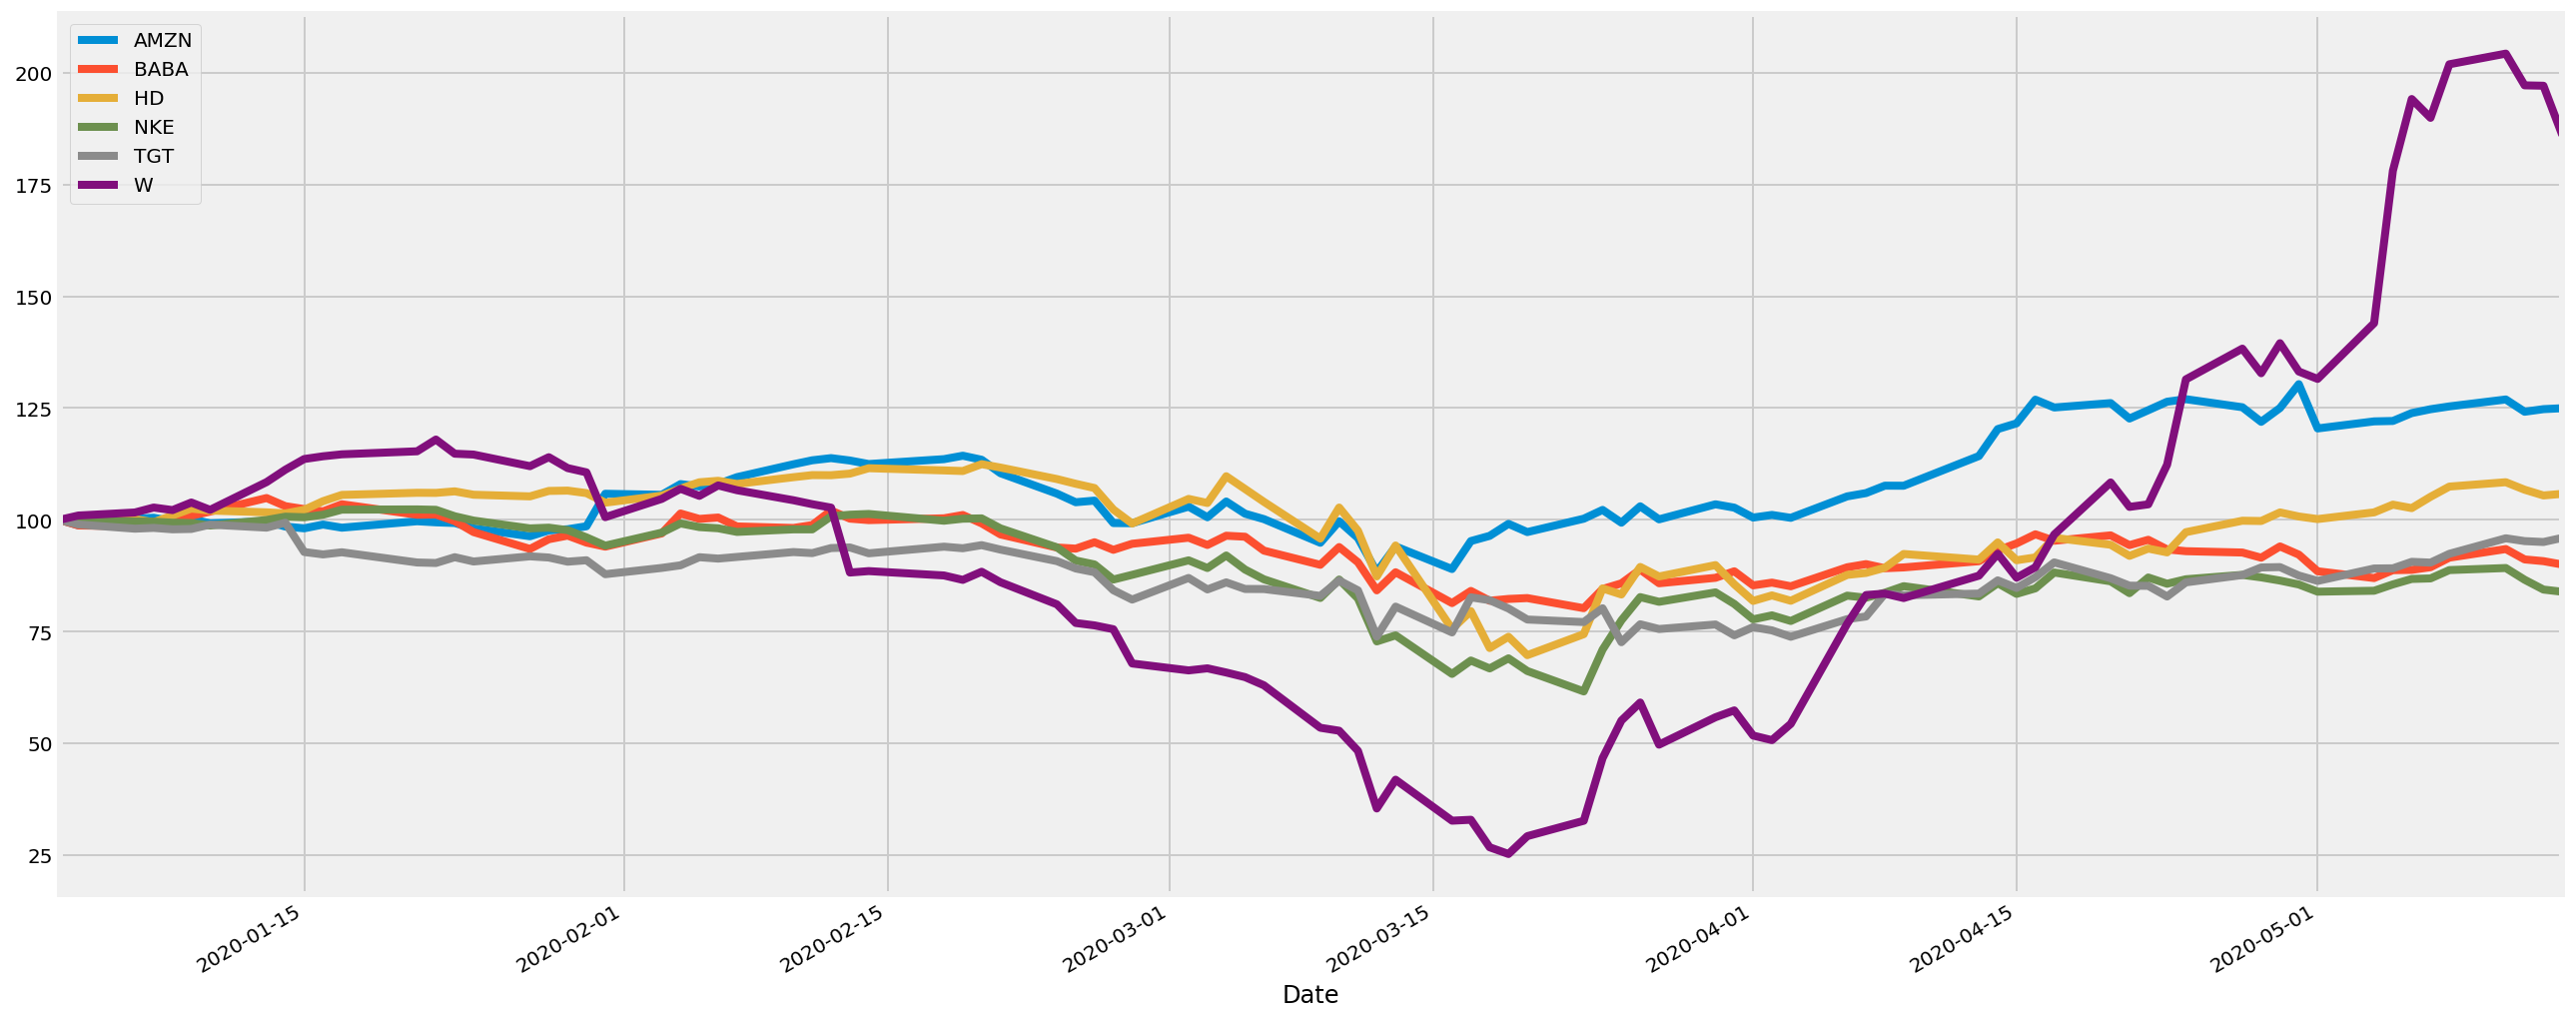

In [43]:
(table/table.iloc[0] * 100).plot(figsize = (20,9))
plt.show()

In [44]:
returns

,AMZN,BABA,HD,NKE,TGT,W
Date,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.012139,-0.012604,-0.003323,-0.002740,-0.010391,0.009663
2020-01-06,0.014886,-0.001659,0.004705,-0.000883,-0.009458,0.006699
2020-01-07,0.002092,0.004570,-0.006547,-0.000491,0.001780,0.010880
2020-01-08,-0.007809,0.001700,0.014964,-0.002260,-0.003231,-0.005538
...,...,...,...,...,...,...
2020-05-08,0.005068,0.023920,0.021704,0.021454,0.021789,0.063090
2020-05-11,0.012351,0.020925,0.009086,0.005196,0.037555,0.011805
2020-05-12,-0.021606,-0.024781,-0.015472,-0.029363,-0.006573,-0.034740


In [45]:
log.mean()*252

W      -1.682650
NKE     0.475307
TGT     0.111567
AMZN   -0.603975
HD     -0.153174
BABA    0.285397
dtype: float64

In [46]:
log.std()*252**0.5

W       1.525301
NKE     0.562814
TGT     0.519624
AMZN    0.445518
HD      0.673960
BABA    0.388591
dtype: float64